# Naive Bayes

In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.dirname((os.path.abspath(''))))
from src.models.Naive_Bayes import train_mvb_bayes, train_mn_bayes, test_model, get_impact_words
from src.data.preprocessing import load_data, preprocess, train_tfidf, split_data, upsampling, get_features, setup
from src.models.logistic_regression import train_log_regression

c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jonas\OneDrive - bwedu\Studium_Master\1_FSS_2022\Data Mining [IE 500]\Projekt\Code\Git\Data_mining\src\data\preprocessing.py:19: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nl

In [2]:
results_mvb = pd.DataFrame(['precision', 'recall', 'accuracy', 'F1', 'Best Params'])
results_mn = pd.DataFrame(['precision', 'recall', 'accuracy', 'F1', 'Best Params'])
results_log = pd.DataFrame(['precision', 'recall', 'accuracy', 'F1', 'Best Params'])

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\Jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 334.53it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


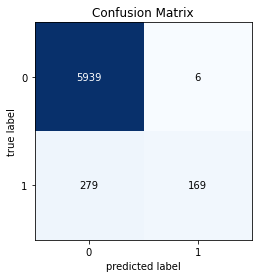

c:\Users\Jonas\miniconda3\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


no_hate: my in and for you a i the to user
hate: in libtard to is of are you a the user


In [3]:
# Don't Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=False, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
# Naive Bayes
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Only Tokenization'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Only Tokenization'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)
#Logistic Regression
log = train_log_regression(df_train, tfidf)
results_log['Only Tokenization'] = test_model(log, df_test, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 976.33it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


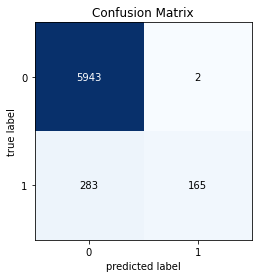

no_hate: life im time u positive happy thankful day love user
hate: liberal racist politics white black â¦ amp trump libtard user


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [4]:
# Remove Stopwords, No Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=False)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Remove Stopwords'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Remove Stopwords'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 508.83it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


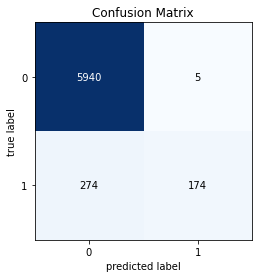

no_hate: eyes heart happy positive thankful day love smiling face user
hate: liberal racist politics white black … amp trump libtard user


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [5]:
# Remove Stopwords, Emojis, No Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=False, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Emojis'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Emojis'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 501.35it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


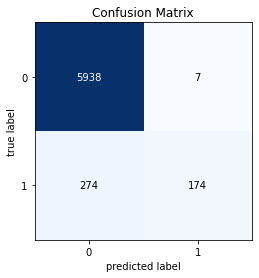

no_hate: eye heart posit happi thank love day smile face user
hate: polit liber racist white … black amp trump libtard user


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Remove Stopwords, Emojis, Stemming, No Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=False, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Stemming'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Stemming'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 501.23it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


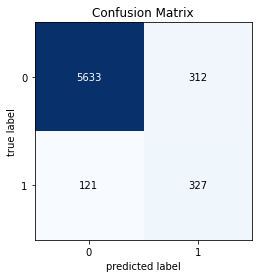

no_hate: eye heart posit happi thank love day smile face user
hate: polit racist liber white … black amp trump libtard user


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Remove Stopwords, Emojis, Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=True, do_lem=False, split=True, upsample=True, do_emojis=True)
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['Upsampling'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['Upsampling'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 501.29it/s]


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


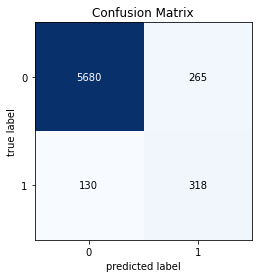

no_hate: eyes heart happy positive thankful day love smiling face user
hate: liberal racist politics white black … amp trump libtard user


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Remove Stopwords, Emojis, No Stemming, Upsampling 
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True) 
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['All_but_stemming'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['All_but_stemming'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 501.53it/s]
c:\Users\jonas\OneDrive - bwedu\Studium_Master\1_FSS_2022\Data Mining [IE 500]\Projekt\Code\Git\Data_mining\src\data\preprocessing.py:121: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(nltk.word_tokenize(text.lower()))


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


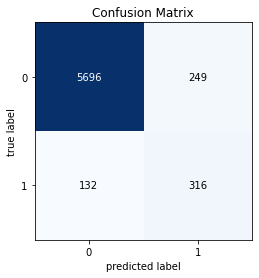

no_hate: im eyes heart happy positive thankful day love smiling face
hate: like liberal racist politics white black … amp trump libtard


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Remove Stopwords, Emojis, No Stemming, Upsampling, No user string
tfidf, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True, no_user=True) 
mvb = train_mvb_bayes(df_train, tfidf)
mn = train_mn_bayes(df_train, tfidf)
results_mvb['no_user'] = test_model(mvb, df_test, tfidf, get_params=True)
results_mn['no_user'] = test_model(mn, df_test, tfidf, plt_confusion = True, get_params=True)
get_impact_words(df_train, tfidf)

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\jonas\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
c:\Users\jonas\OneDrive - bwedu\Studium_Master\1_FSS_2022\Data Mining [IE 500]\Projekt\Code\Git\Data_mining\src\data\preprocessing.py:121: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(nltk.word_tokenize(text.lower()))


There is 25569 training data, of which 7.02% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


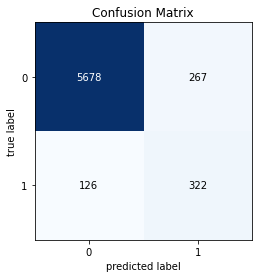

no_hate: im u amp happy eyes heart day love smiling face
hate: people politics racist white black like libtard … trump amp


e:\Programme\Miniconda\envs\DataMining\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [10]:
# Remove Stopwords, Emojis, No Stemming, Upsampling, No user string, Countvectorizer
count, df_train, df_test = setup(rem_stop=True, do_stem=False, do_lem=False, split=True, upsample=True, do_emojis=True, no_user=True, vectorizer='count') 
mvb = train_mvb_bayes(df_train, count)
mn = train_mn_bayes(df_train, count)
results_mvb['count_vec'] = test_model(mvb, df_test, count, get_params=True)
results_mn['count_vec'] = test_model(mn, df_test, count, plt_confusion = True, get_params=True)
get_impact_words(df_train, count)

In [11]:
#results_mn.to_csv("C:/Users/jonas/OneDrive - bwedu/Studium_Master/1_FSS_2022/Data Mining [IE 500]/Projekt/results_mn.csv", sep=';', decimal=',')
results_mn

0               Only Tokenization               Remove Stopwords  \
0  precision                        0.965714                       0.988024   
1     recall                        0.377232                       0.368304   
2   accuracy                         0.95542                        0.95542   
3         F1                        0.542536                       0.536585   
4      alpha  {'alpha': 0.16768329368110074}  {'alpha': 0.2442053094548651}   

                          Emojis                        Stemming  \
0                       0.972067                        0.961326   
1                       0.388393                        0.388393   
2                       0.956359                        0.956046   
3                       0.555024                        0.553259   
4  {'alpha': 0.2442053094548651}  {'alpha': 0.20235896477251566}   

        Upsampling All_but_stemming          no_user        count_vec  
0         0.511737         0.545455         0.559292         0.546689  
1         0.729911         0.709821         0.705357          0.71875  
2          0.93227         0.938214         0.940404         0.938527  
3         0.601656         0.616877         0.623889         0.621022  
4  {'alpha': 0.01}  {'alpha': 0.01}  {'alpha': 0.01}  {'alpha': 0.01}

In [12]:
#results_mvb.to_csv("C:/Users/jonas/OneDrive - bwedu/Studium_Master/1_FSS_2022/Data Mining [IE 500]/Projekt/results_mvb.csv", sep=';', decimal=',')
results_mvb

0             Only Tokenization              Remove Stopwords  \
0  precision                      0.916667                      0.934524   
1     recall                      0.368304                      0.350446   
2   accuracy                      0.953387                      0.952761   
3         F1                      0.525478                       0.50974   
4      alpha  {'alpha': 0.517947467923121}  {'alpha': 0.517947467923121}   

                         Emojis                       Stemming  \
0                      0.926702                       0.934911   
1                      0.395089                       0.352679   
2                       0.95542                       0.952917   
3                      0.553991                       0.512156   
4  {'alpha': 0.517947467923121}  {'alpha': 0.6250551925273969}   

        Upsampling All_but_stemming          no_user        count_vec  
0         0.507576         0.536379         0.537288         0.537288  
1         0.747768         0.707589         0.707589         0.707589  
2         0.931488         0.936649         0.936806         0.936806  
3         0.604693         0.610202          0.61079          0.61079  
4  {'alpha': 0.01}  {'alpha': 0.01}  {'alpha': 0.01}  {'alpha': 0.01}